# ✓ 필요한 라이브러리 import 하기

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


print('얍💢')


%matplotlib inline

얍💢


# ✓ 데이터 경로 지정하기

In [9]:
# data_dir = os.getenv('HOME')+'/aiffel/kaggle/Hackathon_0208/data'
data_dir = os.getenv('HOME')+'/workplace/kaggle_contest/competitive-data-science-predict-future-sales/'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로
item_category_path = join(data_dir,'item_categories.csv')
items_data_path = join(data_dir,'items.csv')
shops_data_path = join(data_dir,'shops.csv')
# test_data_path = join(data_dir,'test.csv')
sub_data_path = join(data_dir,'sample_submission.csv')

print(train_data_path)
print(test_data_path)
print(item_category_path)
print(items_data_path)
print(shops_data_path)
print(sub_data_path)

/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/sales_train.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/test.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/item_categories.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/items.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/shops.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/sample_submission.csv


# 1. 데이터 살펴보기
# ✓ 데이터 불러오기

In [104]:
train_data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
item_category= pd.read_csv(item_category_path)
items = pd.read_csv(items_data_path)
shops =pd.read_csv(shops_data_path)
sub = pd.read_csv(sub_data_path).set_index('ID')


print('train data dim : {}'.format(train_data.shape))
print('test data dim : {}'.format(test.shape))
print('item category data dim : {}'.format(item_category.shape))
print('items data dim : {}'.format(items.shape))
print('shops data dim : {}'.format(shops.shape))
print('sub data dim : {}'.format(sub.shape))


train data dim : (2935849, 6)
test data dim : (214200, 3)
item category data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
sub data dim : (214200, 1)


In [61]:
train_data.head(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [62]:
train_data.tail(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [63]:
test.head(5) 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [64]:
item_category.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [65]:
items.head(5) 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [66]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [67]:
sub.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [68]:

print("train data 중복 수:",sum(train_data.duplicated()))

print("test  data 중복 수:",sum(test.duplicated()))


train data 중복 수: 6
test  data 중복 수: 0


### 중복 행 출력

In [69]:
train_data[train_data.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


### 중복 행 제거

In [70]:
# 중복 제거
train_data.drop_duplicates(inplace=True)

In [71]:
# 중복 재확인
sum(train_data.duplicated())

0

### 결측치 확인

In [72]:
#train데이터 결측치 확인
train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [73]:
#test데이터 결측치 확인
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

### outlier (극단치) 제거

```
극단치란
통계적 자료 분석의 결과를 왜곡시키거나, 자료 분석의 적절성을 위협하는 변숫값 

1000과 2000이상의 동떨어진 데이터 들이 존재한다.
우리는 500이하로 범위로 좁혀주자.
```

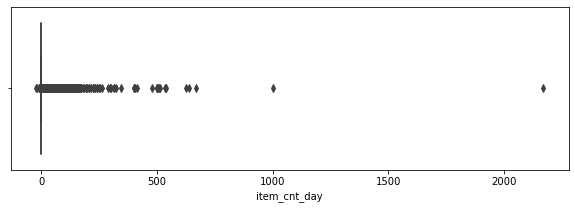

In [74]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [75]:
#outlier (극단치) 제거
train_data = train_data[train_data.item_cnt_day < 500]

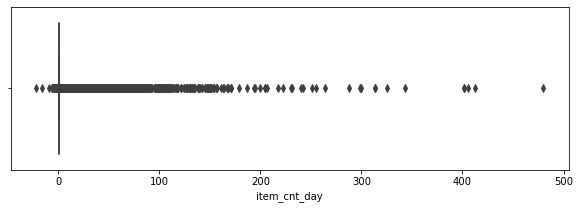

In [76]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [77]:
### 음수값도 제거 해주자.

In [78]:
train_data = train_data[train_data.item_cnt_day >= 0]

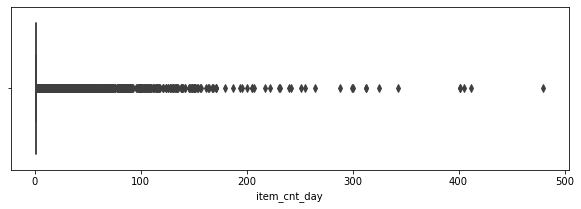

In [79]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [80]:
print('train data dim : {}'.format(train_data.shape))

train data dim : (2928473, 6)


2935849 -> 2928473로 변경

# ------------------------------------------------------------------

# [추가]item에 관한 DATAFRAME 만들기

In [81]:
iteminfo = pd.merge(items, item_category, on='item_category_id')

In [82]:
iteminfo.head()

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD


# [추가]판매에 관한 DATAFrame 만들기

In [83]:
salesitemdata = pd.merge(train_data, iteminfo, on='item_id')

In [84]:
salesitemdata.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


# salesitemdata에서 불필요한 데이터 제거

```
 4개 제거 ('item_price','date','item_category_name','item_name')
```

In [85]:
salesitemdata = salesitemdata.drop(['item_price','date','item_category_name','item_name'], axis=1)

In [86]:
salesitemdata.head()

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id
0,0,59,22154,1.0,37
1,0,24,22154,1.0,37
2,0,27,22154,1.0,37
3,0,25,22154,1.0,37
4,0,25,22154,1.0,37


# salesitemdata 각 칼럼 데이터 int화 시키기

In [87]:
salesitemdata['shop_id'] = salesitemdata['shop_id'].apply(int)
salesitemdata['item_id'] = salesitemdata['item_id'].apply(int)
salesitemdata['item_category_id'] = salesitemdata['item_category_id'].apply(int)

# item_cnt_month로 그룹화해주기

In [88]:

groupSalesDf = salesitemdata.groupby(['date_block_num','item_id','item_category_id','shop_id']).sum()
groupSalesDf['item_cnt_month']=groupSalesDf['item_cnt_day']
groupSalesDf.drop('item_cnt_day', axis=1, inplace=True)
groupSalesDf.reset_index(inplace=True)
#groupSalesDf.drop('item_category_id', axis=1, inplace=True)
groupSalesDf

,date_block_num,item_id,item_category_id,shop_id,item_cnt_month
0,0,19,40,25,1.0
1,0,27,19,1,1.0
2,0,27,19,2,1.0
3,0,27,19,10,1.0
4,0,27,19,19,1.0
...,...,...,...,...,...
1608218,33,22167,49,28,1.0
1608219,33,22167,49,37,1.0
1608220,33,22167,49,42,4.0
1608221,33,22167,49,47,1.0


# month 칼럼 추가하기

칼럼이 추가되도 salesitemdata의 행의 갯수는 변하지 않는다.(1608223개)

In [89]:
groupSalesDf['month'] = groupSalesDf['date_block_num'] % 12
groupSalesDf.tail(3)

,date_block_num,item_id,item_category_id,shop_id,item_cnt_month,month
1608220,33,22167,49,42,4.0,9
1608221,33,22167,49,47,1.0,9
1608222,33,22167,49,50,1.0,9


In [90]:
groupSalesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608223 entries, 0 to 1608222
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   date_block_num    1608223 non-null  int64  
 1   item_id           1608223 non-null  int64  
 2   item_category_id  1608223 non-null  int64  
 3   shop_id           1608223 non-null  int64  
 4   item_cnt_month    1608223 non-null  float64
 5   month             1608223 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 73.6 MB


# item_cnt_month 수치 범위 확인해보기

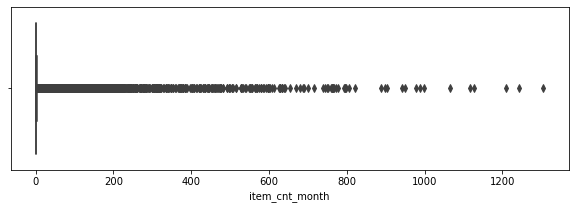

In [91]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_month', data=groupSalesDf);

## 그냥 짤라봤다 모델에 적용은 안한다.

In [92]:
# clip out sales of more than 20 in a month
clippedSales = groupSalesDf.copy()
clippedSales['item_cnt_month'].clip(0,20, inplace=True)
clippedSales['item_cnt_month'].max()

20.0

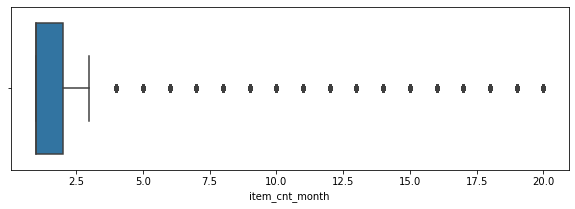

In [93]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_month', data=clippedSales);

# test 데이터는 34번째이다.

In [94]:
test['date_block_num'] = '34'
test

,ID,shop_id,item_id,date_block_num
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34
...,...,...,...,...
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34


In [95]:
test['date_block_num'] = test['date_block_num'].apply(int)

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              214200 non-null  int64
 1   shop_id         214200 non-null  int64
 2   item_id         214200 non-null  int64
 3   date_block_num  214200 non-null  int64
dtypes: int64(4)
memory usage: 6.5 MB


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_month'>

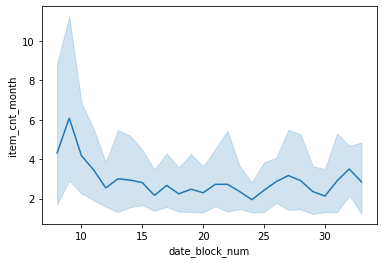

In [97]:
sns.lineplot(x='date_block_num', y='item_cnt_month', data=groupSalesDf[groupSalesDf['item_id']==22167])

### 최근데이터가 더 효율적이기 때문에 0~11 13년에 해당하는 데이터는 제외하자.
```
new_traind에서
date_block_num은 0~33
0  =  January 2013
33 =  October 2015 이다


```

In [98]:
groupSalesDf = groupSalesDf[groupSalesDf.date_block_num > 12]
groupSalesDf

,date_block_num,item_id,item_category_id,shop_id,item_cnt_month,month
740623,13,30,40,7,1.0,1
740624,13,30,40,14,1.0,1
740625,13,30,40,19,1.0,1
740626,13,30,40,24,1.0,1
740627,13,30,40,25,3.0,1
...,...,...,...,...,...,...
1608218,33,22167,49,28,1.0,9
1608219,33,22167,49,37,1.0,9
1608220,33,22167,49,42,4.0,9
1608221,33,22167,49,47,1.0,9


In [99]:
# Split Train Validation Data by Time
X_train = groupSalesDf.drop('item_cnt_month',axis=1)
y_train = groupSalesDf['item_cnt_month']
# X_valid = groupSalesDf[1126386:].drop('item_cnt_month',axis=1)
# y_valid = groupSalesDf['item_cnt_month'][1126386:]

## LMS 노드 참고

```
new_traind에서
date_block_num은 0~33
0  =  January 2013
33 =  October 2015 이다

최근데이터가 더 효율적이기 때문에 0~11 13년에 해당하는 데이터는 제외하자.
```

In [100]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


In [101]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(X_train.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], X_train.values, y_train)), 
                                                  kf=kfold))
print('얍💢')

얍💢


# 첫번째 시도
```
train_set     :  shop_id, item_id, data_block_num 설정
target_set  : item_cnt_month 설정 
```

In [48]:
get_cv_score(models)

Model GradientBoosting CV score : 0.2869
Model XGBoost CV score : 0.4561
Model LightGBM CV score : 0.4227


# 두번재 시도
```
train_set     :  shop_id, item_id, data_block_num, month, item_category_id 설정
target_set    : item_cnt_month 설정
```

In [ ]:
get_cv_score(models)

# 세번재 시도
```
두번째 와 칼럼 동일
13년에 해당하는 데이터는 제거후 훈련
```

In [ ]:
get_cv_score(models)

##### 여기까지

## submit 만들기 

In [105]:
def AveragingBlending(models, X_train, y_train, sub_x):
    for m in models : 
        m['model'].fit(X_train.values, y_train)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

print('얍💢')

얍💢


In [106]:
y_pred = AveragingBlending(models, X_train, y_train, sub)
print(len(y_pred))
y_pred

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 1 